In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

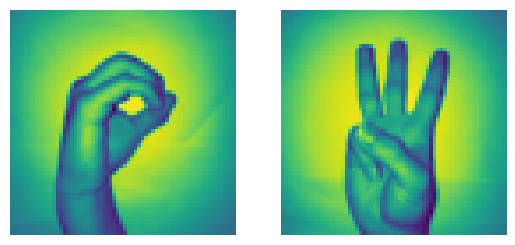

In [2]:
x_data = np.load("X.npy")
y_data = np.load("Y.npy")

img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_data[231].reshape(img_size, img_size))
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(x_data[666].reshape(img_size, img_size))
plt.axis("off")
plt.show()

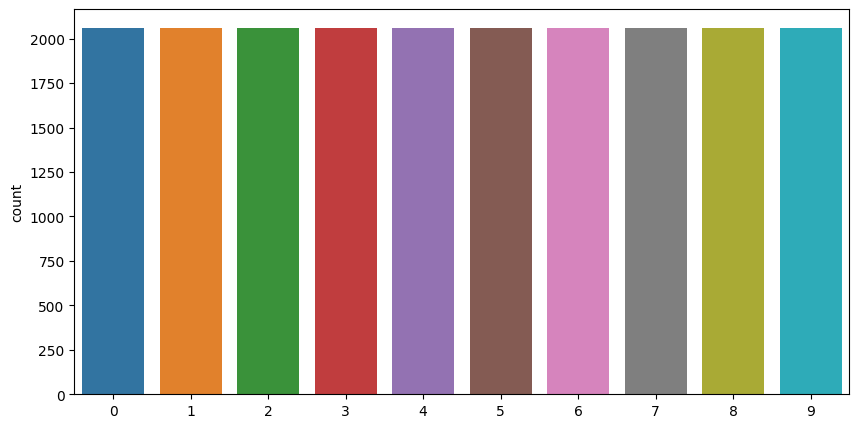

In [3]:
import seaborn as sns

plt.figure(figsize = (10,5))
sns.countplot(y_data)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=0)

x_train = x_train.reshape(-1, 64, 64, 1)
x_test = x_test.reshape(-1, 64, 64, 1)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1649, 64, 64, 1) (413, 64, 64, 1) (1649, 10) (413, 10)


In [9]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential # to create a cnn model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model  =Sequential()

model.add(Conv2D(filters = 8, kernel_size=(5, 5), padding = 'Same', activation = 'relu', input_shape = (64, 64, 1)))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size=(3, 3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size=(3, 3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size=(3, 3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 8)         208       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 32, 32, 8)         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 16)        1168      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 16, 16, 16)       

In [10]:
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs = 100, validation_data = (x_test, y_test))

Epoch 1/100
52/52 [==============================] - 4s 60ms/step - loss: 2.3070 - accuracy: 0.0940 - val_loss: 2.3031 - val_accuracy: 0.0896
Epoch 2/100
52/52 [==============================] - 3s 53ms/step - loss: 2.3033 - accuracy: 0.1037 - val_loss: 2.3032 - val_accuracy: 0.0872
Epoch 3/100
52/52 [==============================] - 3s 58ms/step - loss: 2.3022 - accuracy: 0.1067 - val_loss: 2.3010 - val_accuracy: 0.1162
Epoch 4/100
52/52 [==============================] - 3s 65ms/step - loss: 2.2140 - accuracy: 0.1734 - val_loss: 1.8399 - val_accuracy: 0.3148
Epoch 5/100
52/52 [==============================] - 3s 60ms/step - loss: 1.6004 - accuracy: 0.4124 - val_loss: 1.1060 - val_accuracy: 0.5884
Epoch 6/100
52/52 [==============================] - 4s 71ms/step - loss: 1.1113 - accuracy: 0.6070 - val_loss: 0.7796 - val_accuracy: 0.7506
Epoch 7/100
52/52 [==============================] - 3s 62ms/step - loss: 0.8079 - accuracy: 0.7016 - val_loss: 0.6812 - val_accuracy: 0.7506
Epoch 

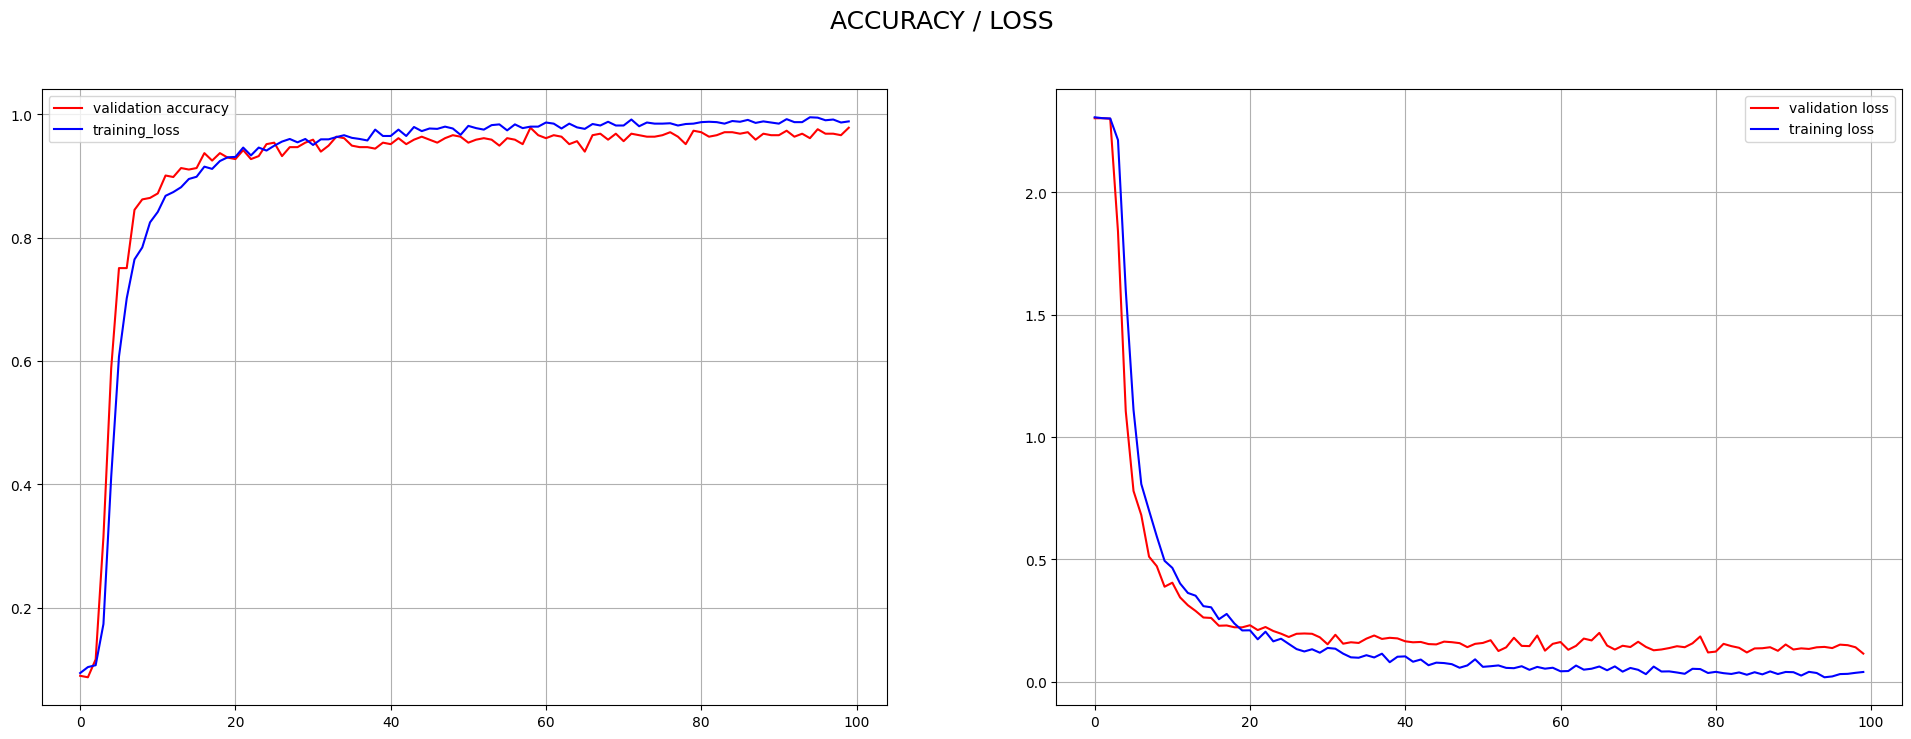

In [14]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(history.history["val_accuracy"], label = "validation accuracy", c = "red")
plt.plot(history.history["accuracy"], label = "training_loss", c = "blue")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history["val_loss"], label = "validation loss", c = "red")
plt.plot(history.history["loss"], label = "training loss", c = "blue")
plt.legend()
plt.grid(True)

plt.suptitle("ACCURACY / LOSS", fontsize = 18)
plt.show()

In [17]:
print("Train accuracy of model : ", history.history['accuracy'][-1])
print("Train loss of the : ", history.history["loss"][-1])
print("Validation accuracy of the model : ", history.history["val_accuracy"][-1])
print("Validation loss of the model : ", history.history["val_loss"][-1])

Train accuracy of model :  0.988477885723114
Train loss of the :  0.03977975994348526
Validation accuracy of the model :  0.9782082438468933
Validation loss of the model :  0.11487793922424316


13/13 [==============================] - 0s 12ms/step


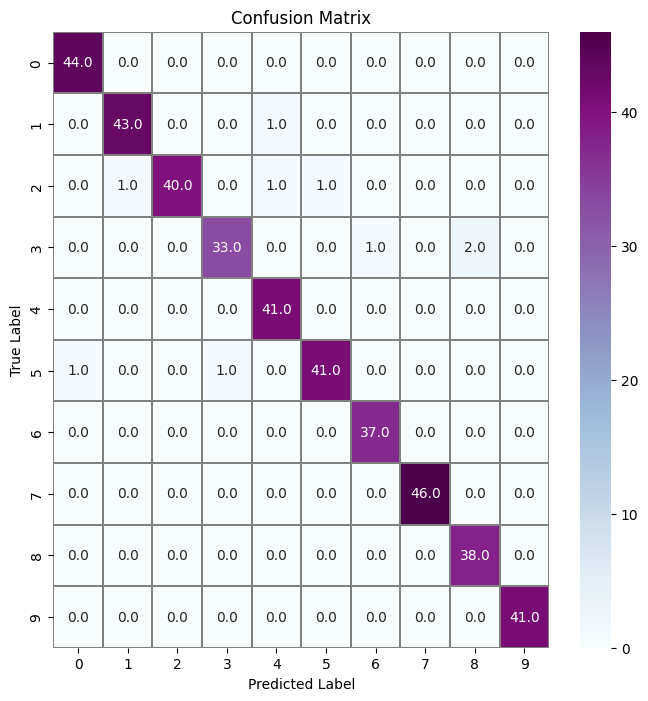

In [19]:
y_pred = model.predict(x_test) # predict the values from validation data

y_pred_classes = np.argmax(y_pred, axis = 1)  # convert prediction classes to one hot vectors

y_true = np.argmax(y_test, axis = 1) # convert validation observations to one hot vectors

confusion_m = confusion_matrix(y_true, y_pred_classes) # confusion matrix

f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_m, annot = True, linewidths = 0.01, cmap = "BuPu", linecolor = "gray", fmt = '.1f', ax = ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

